<a href="https://colab.research.google.com/github/Sathish-Poojari/Edunet_Final_project/blob/main/House_Price_Analysis_And_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Liberary

In [ ]:
# 4 Pillar Liberary
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# model libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from xgboost import XGBRegressor

# model evaluation matrices
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Load Data

In [ ]:
df = pd.read_csv('data.csv')

# Understanding the Data

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


#General Overview of the Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

# Handling Missing Value

In [ ]:
print("Missing values:")
print(df.isnull().sum())
print("\nDuplicate values:",df.duplicated().sum())

Missing values:
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

Duplicate values: 0


#Exploratory Data Analysis (EDA)

## Distribution of Numerical Columns

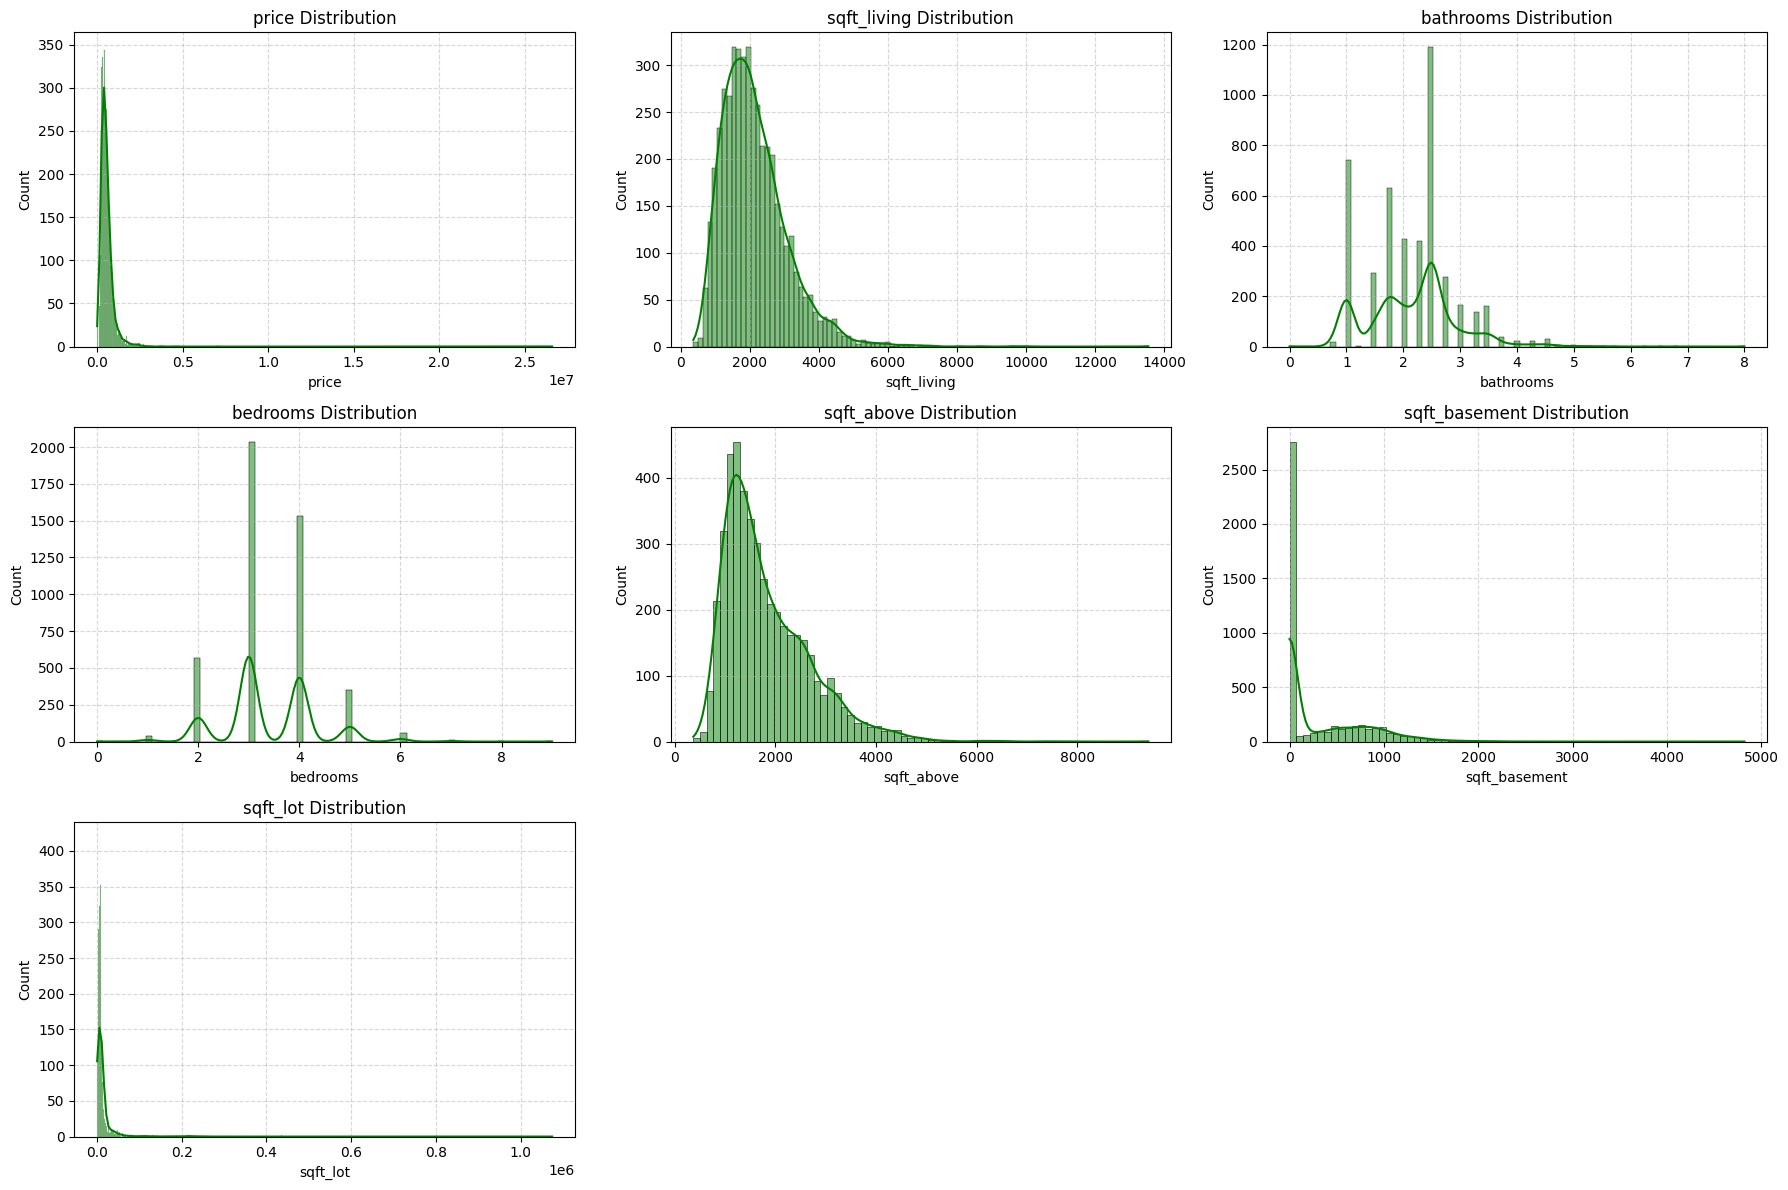

In [ ]:
# List of features to plot
features = ['price', 'sqft_living', 'bathrooms', 'bedrooms',
            'sqft_above', 'sqft_basement', 'sqft_lot']

# Set up the subplot grid (3 rows x 3 columns to fit 7 plots neatly)
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

# Plot distributions
for i, feature in enumerate(features):
    sns.histplot(df[feature], kde=True, ax=axes[i], color='green')
    axes[i].set_title(f'{feature} Distribution')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    axes[i].grid(True, linestyle='--', alpha=0.5)

# Hide unused subplots (if any)
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#Distribution of House Prices

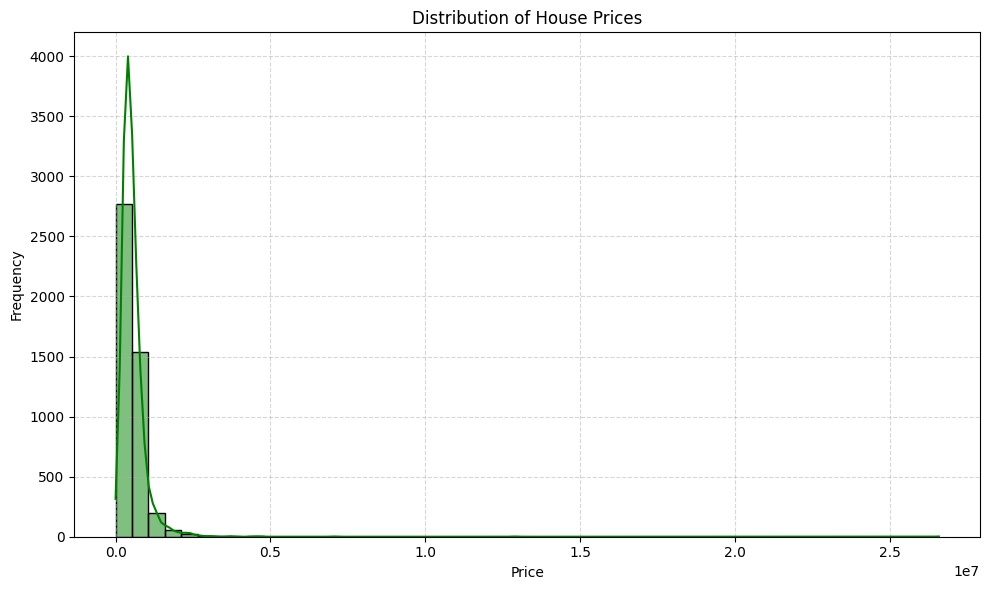

In [ ]:
# distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=50, color='green')
# adding title and labals
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

### 📊 Analysis of Distribution Plot

When I looked at the price distribution before any cleaning or transformation, I immediately noticed how **heavily right-skewed** the data is.

Most houses are priced under **$1 million**, but there are a few extremely expensive properties that stretch the scale way to the right. Because of this, it's kind of hard to see the real pattern in the majority of the data.

This tells me two things:

- I probably need to handle outliers before modeling, so they don’t dominate the results.
- And maybe also apply a log transformation to normalize the target and make it easier for regression models to learn.
  
So, this plot helped me understand that the raw price values might cause problems later if I don't clean or transform them properly.

#Number of Bedrooms and Bathrooms

<ipython-input-37-3954979208>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], x='bedrooms', data=df, palette='Greens_d')
<ipython-input-37-3954979208>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1], x='bathrooms', data=df, palette='Set2')


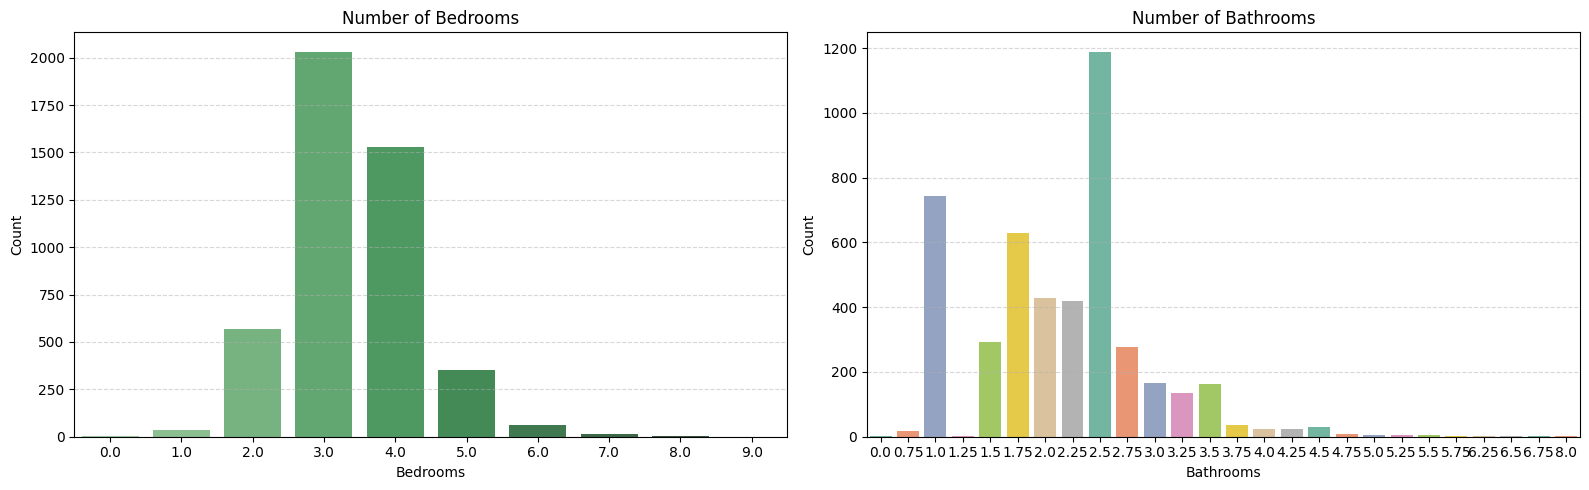

In [ ]:
# Create the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(16, 5))  # 1 row, 2 columns

# First plot: Number of Bedrooms
sns.countplot(ax=axes[0], x='bedrooms', data=df, palette='Greens_d')
axes[0].set_title("Number of Bedrooms")
axes[0].set_xlabel("Bedrooms")
axes[0].set_ylabel("Count")
axes[0].grid(axis='y', linestyle="--", alpha=0.5)

# Second plot: Number of Bathrooms
sns.countplot(ax=axes[1], x='bathrooms', data=df, palette='Set2')
axes[1].set_title("Number of Bathrooms")
axes[1].set_xlabel("Bathrooms")
axes[1].set_ylabel("Count")
axes[1].grid(axis='y', linestyle="--", alpha=0.5)

# Adjust layout
plt.tight_layout()
plt.show()

### 🛏️ Bedrooms & Bathrooms – Distribution Overview

* **Bedrooms**:
  Most homes have **3 or 4 bedrooms**, which aligns with typical family homes.
  A few listings show **0 or 1 bedroom** — possibly studios or data issues.
  Houses with **6+ bedrooms** are rare and may be outliers.

* **Bathrooms**:
  The common range is **1.0 to 2.5 baths**, with **2.5** being most frequent — likely a mix of full and half baths.
  Values like **1.75** or **2.25** suggest detailed bath setups.
  Listings with **6 or more bathrooms** are uncommon and likely high-end properties.

🔍 **Modeling Note**:
To simplify the data and reduce noise, grouping extreme or unusual values may improve model stability.



#Price vs Condition

<ipython-input-38-1306753824>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='condition', y='price', data=df, palette='coolwarm')


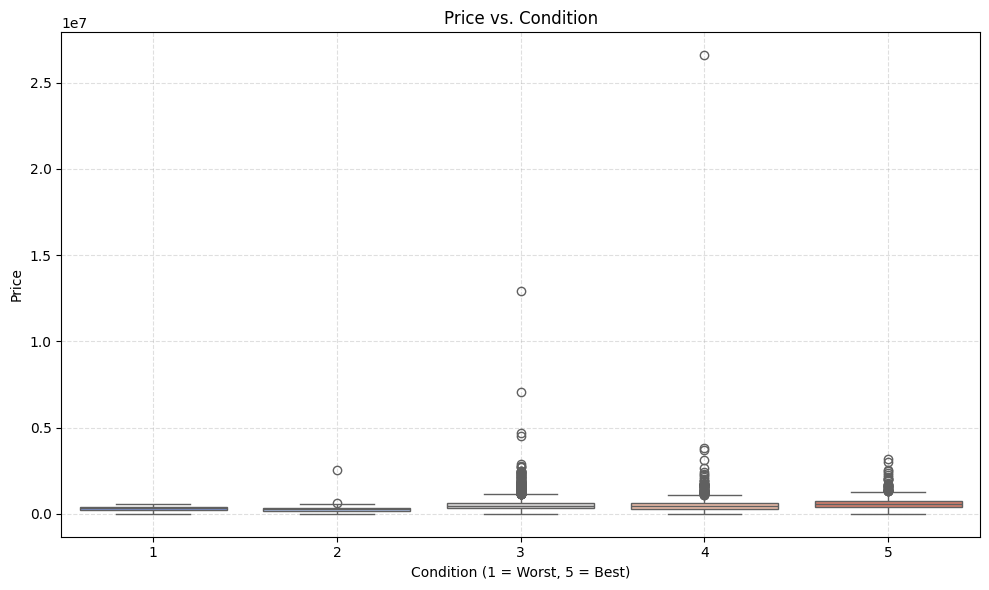

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='price', data=df, palette='coolwarm')
plt.title("Price vs. Condition")
plt.xlabel("Condition (1 = Worst, 5 = Best)")
plt.ylabel("Price")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

### 📦 Price vs. Condition – Boxplot Insight

* Houses with **better condition (4 or 5)** show **slightly higher median prices**, but overall, **price ranges overlap** across all condition levels.
* There are **many outliers**, especially in **condition 3 and 4**, with some extremely high prices that can **skew the results**.

🔍 **Overall**:
**Condition alone** isn’t a strong price predictor. It likely adds more value when **combined with other features** like size, location, or renovation status.


#Top 10 Cities

<ipython-input-39-1007771260>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['city'].isin(top_cities)], x='city', order=top_cities, palette='Greens_d')


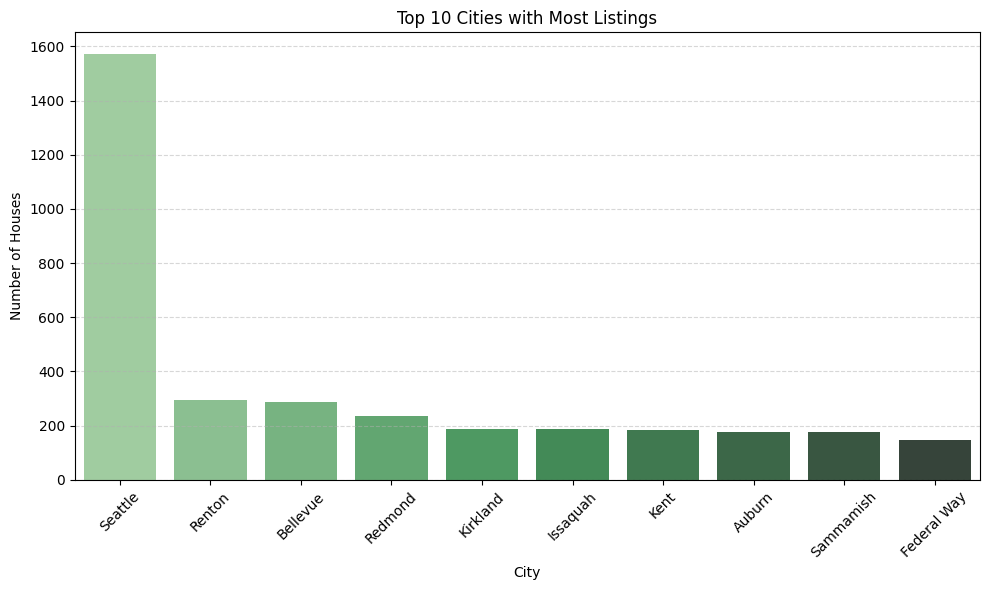

In [ ]:
plt.figure(figsize=(10, 6))
top_cities = df['city'].value_counts().nlargest(10).index
sns.countplot(data=df[df['city'].isin(top_cities)], x='city', order=top_cities, palette='Greens_d')
plt.title("Top 10 Cities with Most Listings")
plt.xlabel("City")
plt.ylabel("Number of Houses")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

### 🏙️ Analysis - Top 10 Cities by Listings

Seattle has by far the most listings, way ahead of other cities like Renton, Bellevue, and Redmond.
This shows that location is a key feature, and some cities are overrepresented in the data.
It could help to also explore average prices by city to capture local market trends during modeling.



# Correlation Matrix

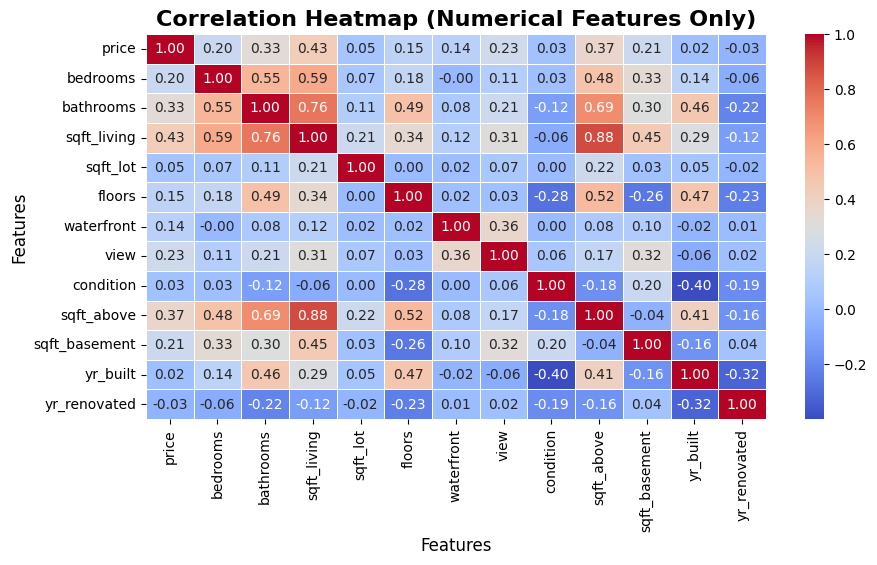

In [ ]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()

# Set figure size for better readability
plt.figure(figsize=(10, 5))

# Create a heatmap with improved styling
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Adding a title with emphasis
plt.title("Correlation Heatmap (Numerical Features Only)", fontsize=16, fontweight='bold')

# Improving axis labels for clarity
plt.xlabel("Features", fontsize=12)
plt.ylabel("Features", fontsize=12)

# Displaying the final plot
plt.show()

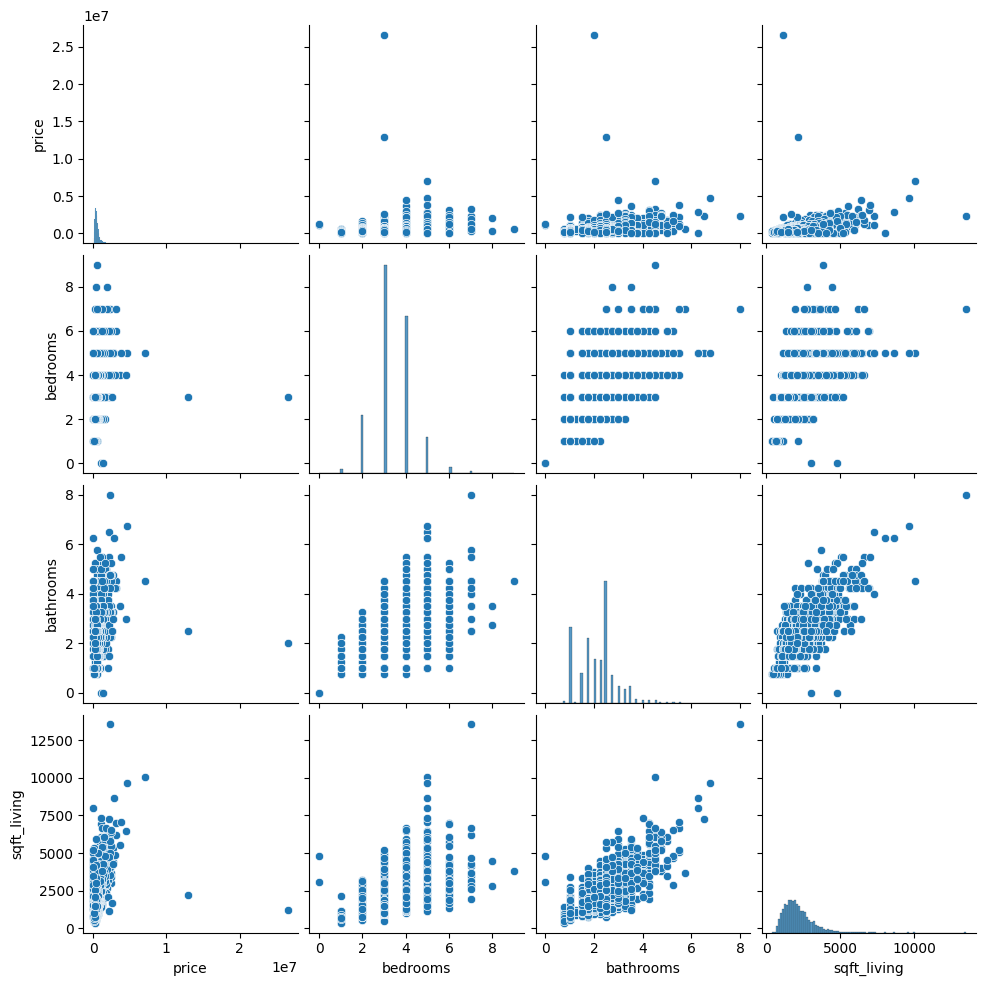

In [ ]:
# pairplot
sns.pairplot(df[['price', 'bedrooms', 'bathrooms', 'sqft_living']])
plt.show()

#Outlier Detection and Removal

In [ ]:
print(f"Original dataset shape: {df.shape}")

def remove_outliers(df, x):
    # Set Limits
    # q25 => Frist Quatile and q75=> Third Quatile
    q25, q75 = np.percentile(df[x], 25), np.percentile(df[x], 75)
    # interQuatile range
    iqr = q75 - q25
    cut_off = iqr * 1.5
    # lower and upper bonds
    lower, upper = 1 ,  (q75 + cut_off)
    df = df[(df[x] < upper) & (df[x] > lower)]
    print('Outliers of "{}" are removed'.format(x))
    return df

df = remove_outliers(df, 'price')
df = remove_outliers(df, 'sqft_lot')
print(f"After removing outliers from dataset shape: {df.shape}")

Original dataset shape: (4600, 18)
Outliers of "price" are removed
Outliers of "sqft_lot" are removed
After removing outliers from dataset shape: (3809, 18)


# Feature Engineering

To help the model learn more effectively, we **created new features** and **removed less useful ones**.

✨ **New Features Added:**

* **year\_sold** – Extracted from the `date` column.
* **house\_age** – Calculated as `year_sold - yr_built`.
* **has\_been\_renovated** – Binary flag showing if the house was ever renovated.

🗑️ **Columns Removed:**

* `date`, `yr_renovated`, `yr_built`, `street`, and `country` were dropped due to being **irrelevant**, **redundant**, or **hard to use directly**.

These changes aim to keep the data **clean, meaningful**, and more useful for prediction.

In [ ]:
# Extract year from date
df['year_sold'] = pd.to_datetime(df['date']).dt.year
# Create house age
df['house_age'] = df['year_sold'] - df['yr_built']
# Create binary renovation flag
df['has_been_renovated'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
# Drop unnecessary columns
df.drop(['date', 'yr_renovated', 'yr_built', 'street', 'country'], axis=1, inplace=True)

# Show updated DataFrame
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,statezip,year_sold,house_age,has_been_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline,WA 98133,2014,59,1
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent,WA 98042,2014,48,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue,WA 98008,2014,51,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond,WA 98052,2014,38,1
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,Seattle,WA 98115,2014,76,1


✅ **After Feature Engineering – Summary**
The dataset is now **cleaner and more informative**, with helpful new features and unnecessary columns removed.

✨ **New Features Added:**

* **year\_sold** – Extracted from `date`.
* **house\_age** – Difference between `year_sold` and `yr_built`.
* **has\_been\_renovated** – Binary: 1 if renovated, 0 otherwise.

🗑️ **Dropped Columns:**

* `date`, `yr_renovated`, `yr_built`, `street`, and `country` – removed due to being redundant or not useful.

🏙️ **Why Keep the `city` Column?**

* **City** captures important location-based differences in house prices.
* It’s easier to **encode** than `street`, which has too many unique values.
* Unlike `country` (which had only one value), `city` adds real predictive value.
* Helps the model **learn local market patterns** without adding noise.

The dataset is now **better structured for encoding and modeling**.


# **Data Preprocessing**
Before training, we prepared the data with encoding, scaling, and a proper train/test split to ensure **consistency and model readiness**.

🔄 **Key Steps:**

* **Encoding** – Applied **One-Hot Encoding** to convert categorical features (e.g., `city`, `statezip`, `condition`, `view`) into numerical format.
* **Scaling** – Normalized numerical features to help models learn more effectively.
* **Train/Test Split** – Split the dataset into **80% training** and **20% testing** for fair evaluation.

🛠️ **How it’s done:**
Used **`ColumnTransformer`** and **`Pipeline`** to apply all preprocessing steps in a **clean and consistent** way across different models.

The data is now fully prepped and ready for modeling.

In [ ]:
# Target & Features
X = df.drop("price", axis=1)
y = df["price"]

In [ ]:
# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Numerical and categorical features
numeric_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                    'sqft_above', 'sqft_basement', 'house_age']
categorical_features = ['waterfront', 'view', 'condition', 'city', 'statezip', 'has_been_renovated']

In [ ]:
# Define transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# **Model Training**
In this step, we trained **multiple regression models** using the preprocessed training data.

🛠️ **How It Works:**

* Each model is wrapped in a **pipeline** that handles **scaling** and **encoding** automatically.
* Models are stored in a **dictionary** and trained in a **loop**, making the process clean, efficient, and reusable.
* This setup also allows for easy **model comparison** and **evaluation** later on.

The models are now trained and ready for performance testing on the validation set.


In [ ]:
# create model list
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

In [ ]:
# store the trained models here
trained_models = {}

In [ ]:
# train each model
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    trained_models[name] = pipeline
    print(f"{name} trained successfully.")

Linear Regression trained successfully.
Decision Tree trained successfully.
Random Forest trained successfully.
Gradient Boosting trained successfully.
XGBoost trained successfully.


In [ ]:
# Dictionary to store evaluation results
evaluation_results = {
    "Model": [],
    "MAE": [],
    "RMSE": [],
    "R²": []
}

# Evaluate each trained model
for name, model in trained_models.items():
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    evaluation_results["Model"].append(name)
    evaluation_results["MAE"].append(mae)
    evaluation_results["RMSE"].append(rmse)
    evaluation_results["R²"].append(r2)

# Create a DataFrame to display results
results_df = pd.DataFrame(evaluation_results)
results_df = results_df.sort_values(by="RMSE")
print("📊 Model Evaluation Results:")
display(results_df)

📊 Model Evaluation Results:


,Model,MAE,RMSE,R²
0,Linear Regression,68081.480926,104012.011420,0.767723
4,XGBoost,69296.938857,105003.356335,0.763274
2,Random Forest,77708.110604,116009.616478,0.711047
3,Gradient Boosting,83121.046610,116090.285052,0.710645
1,Decision Tree,106133.182792,157781.445388,0.465496


<ipython-input-53-1252013797>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R²", data=results_df, palette="Greens_d")


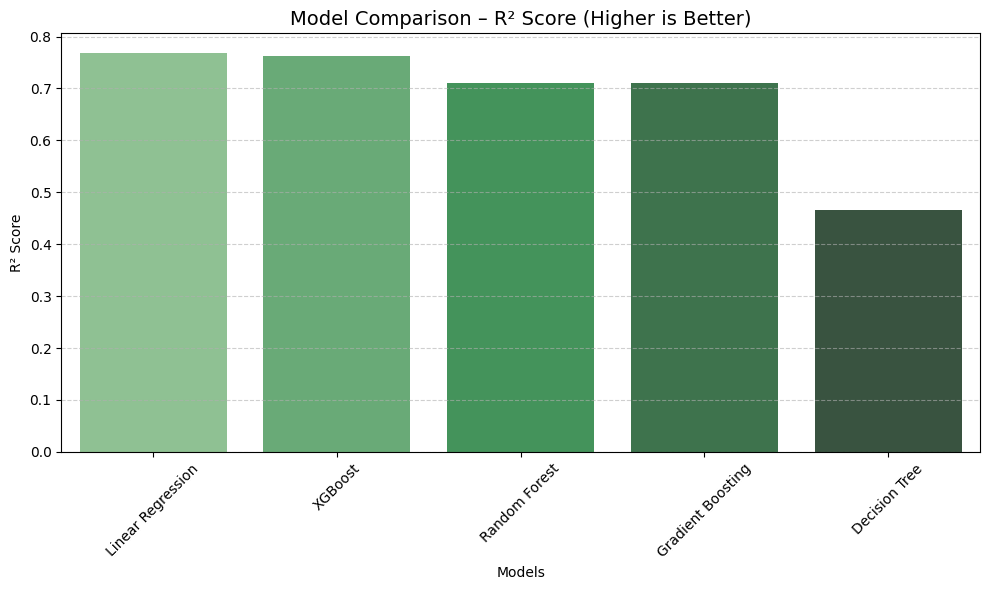

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="R²", data=results_df, palette="Greens_d")
plt.title("Model Comparison – R² Score (Higher is Better)", fontsize=14)
plt.xlabel("Models")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# 🏆 **Best Model**
Among all models, **Linear Regression** delivered the best performance based on **MAE**, **RMSE**, and **R² score**.

✅ **Why it performed well:**

* It’s a **simple and interpretable** model.
* The dataset is **well-cleaned** and **features show mostly linear relationships** with the target.
* Works effectively when **assumptions of linearity** are reasonably met.

⚠️ **Keep in mind:**
While Linear Regression performed best here, it may **struggle with complex patterns** in other datasets. For more non-linear relationships, advanced models like **Random Forest** or **Gradient Boosting** might generalize better.